In [1]:
import json
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

'' to import online ''\
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

In [2]:
datastore=pd.read_csv('IMDB Dataset.csv')

"to open file in google colab"\
with open('Sarcasm_Headlines_Dataset.json','r') as f:
    datastore=json.load(f)

importing the dataset in json format

In [3]:
datastore.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
datastore['sentiment'] = datastore['sentiment'].apply(lambda x: 0 if x.strip()=='negative' else 1)
datastore

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


Taking the required features from data  as which headline -> sentences & is_sarcastic -> labels.

In [5]:
sentences=datastore['review']
labels=datastore['sentiment']

In [6]:
sentences

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [7]:
labels

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64

spliting data into train and test

In [8]:
train_sentences=sentences[:40000]
test_sentences=sentences[40000:]
train_labels=labels[0:40000]
test_labels=labels[40000:]

In [9]:
tokenizer = Tokenizer(num_words =10000 , oov_token = "<OOV>")
tokenizer.fit_on_texts(train_sentences)

word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, maxlen=100, padding='post', truncating='post')

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, maxlen=100, padding='post', truncating='post')





In [10]:
train_padded=np.array(train_padded)
test_padded=np.array(test_padded)
train_labels=np.array(train_labels)
test_labels=np.array(test_labels)

Build the model

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length = 100),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
    
]) 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
history=model.fit(train_padded,train_labels,epochs=30,validation_data=(test_padded,test_labels),verbose=2)

Epoch 1/30
1250/1250 - 5s - loss: 0.4620 - accuracy: 0.7873 - val_loss: 0.3638 - val_accuracy: 0.8373
Epoch 2/30
1250/1250 - 3s - loss: 0.3157 - accuracy: 0.8665 - val_loss: 0.3568 - val_accuracy: 0.8426
Epoch 3/30
1250/1250 - 3s - loss: 0.2807 - accuracy: 0.8847 - val_loss: 0.3676 - val_accuracy: 0.8411
Epoch 4/30
1250/1250 - 3s - loss: 0.2603 - accuracy: 0.8941 - val_loss: 0.3831 - val_accuracy: 0.8372
Epoch 5/30
1250/1250 - 3s - loss: 0.2463 - accuracy: 0.9000 - val_loss: 0.4002 - val_accuracy: 0.8329
Epoch 6/30
1250/1250 - 3s - loss: 0.2356 - accuracy: 0.9067 - val_loss: 0.4194 - val_accuracy: 0.8309
Epoch 7/30
1250/1250 - 3s - loss: 0.2281 - accuracy: 0.9084 - val_loss: 0.4265 - val_accuracy: 0.8288
Epoch 8/30
1250/1250 - 3s - loss: 0.2203 - accuracy: 0.9139 - val_loss: 0.4458 - val_accuracy: 0.8261
Epoch 9/30
1250/1250 - 4s - loss: 0.2150 - accuracy: 0.9162 - val_loss: 0.4557 - val_accuracy: 0.8254
Epoch 10/30
1250/1250 - 2s - loss: 0.2100 - accuracy: 0.9197 - val_loss: 0.4707 - 

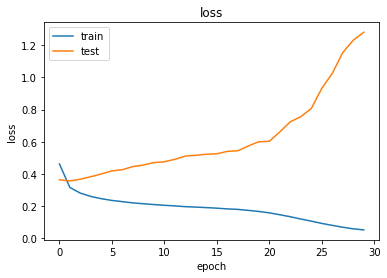

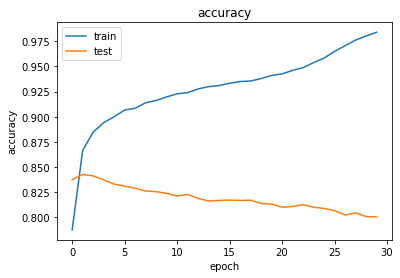

In [14]:
import matplotlib.pyplot as plt
def histogram(string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.title(string)
    plt.ylabel(string)
    plt.xlabel('epoch')
    plt.legend(['train','test'],loc='upper left')
    plt.show()
histogram('loss')
histogram('accuracy')

In [15]:
from keras.callbacks import EarlyStopping
callbacks=EarlyStopping(monitor='val_accuracy',verbose=1,patience=5,mode='auto')

In [16]:
history=model.fit(train_padded,train_labels,epochs=30,validation_data=(test_padded,test_labels),verbose=2,callbacks=[callbacks])

Epoch 1/30
1250/1250 - 5s - loss: 0.0441 - accuracy: 0.9868 - val_loss: 1.4449 - val_accuracy: 0.8040
Epoch 2/30
1250/1250 - 4s - loss: 0.0396 - accuracy: 0.9883 - val_loss: 1.5552 - val_accuracy: 0.8016
Epoch 3/30
1250/1250 - 5s - loss: 0.0330 - accuracy: 0.9912 - val_loss: 1.6320 - val_accuracy: 0.7999
Epoch 4/30
1250/1250 - 6s - loss: 0.0293 - accuracy: 0.9926 - val_loss: 1.7571 - val_accuracy: 0.7992
Epoch 5/30
1250/1250 - 4s - loss: 0.0277 - accuracy: 0.9926 - val_loss: 1.7943 - val_accuracy: 0.7963
Epoch 6/30
1250/1250 - 3s - loss: 0.0250 - accuracy: 0.9934 - val_loss: 1.8983 - val_accuracy: 0.7993
Epoch 00006: early stopping
